# Level 2: Exploring Data

Before continuing on with level 2, make sure you've generated the `weather_data.csv` file we generated from level 1. This contains weather data from 2013 to 2015, and we'll be exploring that data within this level.

We'll now continue our data project by exploring the treasure trove of data we collected in level 1. This is also an overlooked but important part of data science; it helps us catch errors that may not have come up in the process of obtaining the data. Additionally, it gives us some intuition for the data, which is helpful when it comes to modeling.

`Pandas` is the workhorse of Python data analysis. Let's use it to slurp up our data in one shot:

In [1]:
import pandas as pd

data = pd.read_csv('weather_data.csv')

The basic object that Pandas uses is called a "data frame". You can think of it essentially as a spreadsheet or a two-dimensional array. Each row of the spreadsheet is another data point, while each column is a variable.

In [2]:
pd.options.display.max_rows = 7
data

,Month,Day,Year,Mean Temperature,Max Temperature,Min Temperature,Dew Point,Average Humidity,Maximum Humidity,Minimum Humidity,Precipitation,Wind Speed,Max Wind Speed,Max Gust Speed
0,1,1,2013,33,40,26,22,54,64,44,0.00,7,15,26
1,1,2,2013,28,33,22,11,48,57,39,0.00,6,15,22
2,1,3,2013,28,32,24,14,56,68,43,0.00,5,13,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,12,29,2015,40,46,34,37,87,92,82,0.45,7,18,24
1093,12,30,2015,43,48,38,39,81,86,76,0.19,4,9,13
1094,12,31,2015,45,48,42,37,71,92,49,0.03,5,14,20


Before going on, let's rename the columns to be lowercase and remove spaces. This is a standard practice to help remember the format of the column names (no more guessing whether it's "dew point" or "Dew point" or "Dew Point").

In [3]:
data.columns = [name.lower().replace(" ", "_")
                for name in data.columns]
data

,month,day,year,mean_temperature,max_temperature,min_temperature,dew_point,average_humidity,maximum_humidity,minimum_humidity,precipitation,wind_speed,max_wind_speed,max_gust_speed
0,1,1,2013,33,40,26,22,54,64,44,0.00,7,15,26
1,1,2,2013,28,33,22,11,48,57,39,0.00,6,15,22
2,1,3,2013,28,32,24,14,56,68,43,0.00,5,13,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,12,29,2015,40,46,34,37,87,92,82,0.45,7,18,24
1093,12,30,2015,43,48,38,39,81,86,76,0.19,4,9,13
1094,12,31,2015,45,48,42,37,71,92,49,0.03,5,14,20


Data frames are kind of like dictionaries, where the keys are column names and the values is `Series` of data.

In [4]:
data["dew_point"]

0       22
1       11
2       14
        ..
1092    37
1093    39
1094    37
Name: dew_point, dtype: int64

These series work just like numpy arrays, supporting all the standard arithmetic and reductions operators:

In [5]:
print(data["dew_point"].mean())
data["dew_point"] * 5

40.2630136986


0       110
1        55
2        70
       ... 
1092    185
1093    195
1094    185
Name: dew_point, dtype: int64

**Unlike** a dictionary, though, the `len` of a data frame is not the number of "keys" (columns). To get that, you need to do:

In [6]:
print(len(data))
print(len(data.columns))
data.columns

1095
14


Index(['month', 'day', 'year', 'mean_temperature', 'max_temperature',
       'min_temperature', 'dew_point', 'average_humidity', 'maximum_humidity',
       'minimum_humidity', 'precipitation', 'wind_speed', 'max_wind_speed',
       'max_gust_speed'],
      dtype='object')

You can also get both dimensions at once using `.shape`:

In [7]:
data.shape

(1095, 14)

You can also get rows of the data frame using the `.iloc` selector. There, the `.iloc` works like a list:

In [8]:
data.iloc[0]

month                1
day                  1
year              2013
                  ... 
wind_speed           7
max_wind_speed      15
max_gust_speed      26
Name: 0, dtype: object

In [9]:
data.iloc[:5]

,month,day,year,mean_temperature,max_temperature,min_temperature,dew_point,average_humidity,maximum_humidity,minimum_humidity,precipitation,wind_speed,max_wind_speed,max_gust_speed
0,1,1,2013,33,40,26,22,54,64,44,0.00,7,15,26
1,1,2,2013,28,33,22,11,48,57,39,0.00,6,15,22
2,1,3,2013,28,32,24,14,56,68,43,0.00,5,13,20
3,1,4,2013,34,37,30,19,56,63,48,0.00,8,18,28
4,1,5,2013,37,42,32,19,48,56,39,0.00,7,17,26


Great, we can now access whole regions of data using the appropriate syntax depending on whether we want rows or column. Let's now try programatically looking for subsets of the data. For example, say we only wanted the data that was recorded in the month of December.

In [10]:
december_data = data[data.month == 12]
december_data[:5]

,month,day,year,mean_temperature,max_temperature,min_temperature,dew_point,average_humidity,maximum_humidity,minimum_humidity,precipitation,wind_speed,max_wind_speed,max_gust_speed
334,12,1,2013,43,49,36,29,61,76,46,0.00,2,7,10
335,12,2,2013,45,49,41,34,68,82,53,0.00,3,8,11
336,12,3,2013,46,53,38,34,66,86,46,0.00,3,8,12
337,12,4,2013,47,52,41,36,64,73,54,0.00,3,8,12
338,12,5,2013,54,60,48,50,83,93,72,0.01,2,9,17


We can chain these conditions to ensure that multiple conditions are met. Let's try extracting data from May 2015.

In [11]:
may_2015_data = data[(data.month == 5) & (data.year == 2015)]
may_2015_data[:5]

,month,day,year,mean_temperature,max_temperature,min_temperature,dew_point,average_humidity,maximum_humidity,minimum_humidity,precipitation,wind_speed,max_wind_speed,max_gust_speed
850,5,1,2015,56,63,49,39,59,71,46,0.00,5,14,18
851,5,2,2015,61,74,48,40,56,80,31,0.00,3,15,22
852,5,3,2015,66,80,51,38,41,59,22,0.00,3,10,18
853,5,4,2015,71,85,57,44,47,72,22,0.00,5,15,23
854,5,5,2015,76,85,66,50,44,53,34,0.00,4,13,21


Now that we know how to explore the data, let's look at some techniques for summarizing the data in different columns. First up is the `dtypes` attribute.

In [12]:
data.dtypes

month              int64
day                int64
year               int64
                   ...  
wind_speed        object
max_wind_speed    object
max_gust_speed    object
dtype: object

This function seems simple because it just prints out the type of each column; however, it's useful if you spot something you don't expect. For example, we expect that `precipitation`, `wind_speed`, `max_wind_speed`, and `max_gust_speed` are all numeric types, but they are currently `object` types. Let's see if we can figure out what's going on. The `unique` function will show us all of the unique values of a particular column.

In [13]:
data.precipitation.unique()

array(['0.00', 'T', '0.55', '0.02', '0.09', '0.12', '0.69', '0.07', '0.22',
       '0.06', '0.04', '0.90', '1.15', '0.38', '0.49', '0.03', '0.15',
       '0.26', '0.01', '0.14', '1.56', '0.19', '0.56', '0.79', '0.60',
       '0.36', '0.17', '0.08', '0.63', '0.05', '3.02', '0.50', '1.09',
       '1.81', '0.30', '0.52', '0.85', '0.87', '0.13', '4.16', '0.48',
       '1.38', '1.26', '0.24', '0.84', '0.53', '0.23', '0.25', '0.31',
       '0.65', '0.46', '0.43', '1.60', '0.72', '0.45', '0.51', '1.98',
       '0.73', '1.20', '0.33', '0.29', '0.11', '0.10', '1.17', '1.43',
       '1.78', '0.16', '0.35', '0.92', '0.21', '0.34', '0.71', '4.97',
       '0.41', '0.37', '1.54', '0.91', '0.40', '1.28', '0.96', '0.39',
       '1.30', '0.62', '0.32', '1.18', '1.11', '1.51', '0.61', '0.20',
       '0.70', '1.24', '1.22', '2.54', '0.80', '2.10', '1.02', '0.67',
       '0.76', '0.81', '0.27', '1.37', '1.46', '0.57', '0.64', '1.12',
       '0.42', '1.95', '1.58', '1.08', '0.89', '1.40', '1.25', '1.21',
 

It looks like we found the problem! While most of the values are things we'd expect for a numeric column, we also have an odd one out: `'T'`. We can automatically convert the whole data frame to be numeric types using the handy `convert_objects` function. 

In [14]:
clean_data = data.convert_objects(convert_numeric=True)
print(clean_data.dtypes)
clean_data.precipitation.unique()

month               int64
day                 int64
year                int64
                   ...   
wind_speed        float64
max_wind_speed    float64
max_gust_speed    float64
dtype: object


array([ 0.  ,   nan,  0.55,  0.02,  0.09,  0.12,  0.69,  0.07,  0.22,
        0.06,  0.04,  0.9 ,  1.15,  0.38,  0.49,  0.03,  0.15,  0.26,
        0.01,  0.14,  1.56,  0.19,  0.56,  0.79,  0.6 ,  0.36,  0.17,
        0.08,  0.63,  0.05,  3.02,  0.5 ,  1.09,  1.81,  0.3 ,  0.52,
        0.85,  0.87,  0.13,  4.16,  0.48,  1.38,  1.26,  0.24,  0.84,
        0.53,  0.23,  0.25,  0.31,  0.65,  0.46,  0.43,  1.6 ,  0.72,
        0.45,  0.51,  1.98,  0.73,  1.2 ,  0.33,  0.29,  0.11,  0.1 ,
        1.17,  1.43,  1.78,  0.16,  0.35,  0.92,  0.21,  0.34,  0.71,
        4.97,  0.41,  0.37,  1.54,  0.91,  0.4 ,  1.28,  0.96,  0.39,
        1.3 ,  0.62,  0.32,  1.18,  1.11,  1.51,  0.61,  0.2 ,  0.7 ,
        1.24,  1.22,  2.54,  0.8 ,  2.1 ,  1.02,  0.67,  0.76,  0.81,
        0.27,  1.37,  1.46,  0.57,  0.64,  1.12,  0.42,  1.95,  1.58,
        1.08,  0.89,  1.4 ,  1.25,  1.21,  1.55])

Great, it looks like the conversion did what we expected to for the data types, but it introduced this weird value of `nan`. We can drop the rows containing NAs out of the data frame using the `dropna` function.

In [15]:
clean_data = clean_data.dropna()

Awesome, now that we have cleaned up our data, let's try using the `describe` function to get a better idea of what's going on in the data.

In [16]:
pd.options.display.max_rows = 999
clean_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
month,1008,6.583333,3.420686,1,4,7,10.00,12.00
day,1008,15.585317,8.798791,1,8,15,23.00,31.00
year,1008,2014.009921,0.818056,2013,2013,2014,2015.00,2015.00
mean_temperature,1008,56.093254,18.044831,11,42,58,72.00,90.00
max_temperature,1008,63.052579,18.898837,18,47,65,80.00,98.00
min_temperature,1008,48.629960,17.503609,2,35,50,64.00,83.00
dew_point,1008,40.452381,19.303506,-12,26,43,56.00,73.00
average_humidity,1008,59.195437,13.629751,27,49,58,69.00,96.00
maximum_humidity,1008,75.399802,14.968550,39,64,76,89.00,100.00
minimum_humidity,1008,42.499008,14.828714,11,32,40,51.00,92.00


(The `transpose` function just turns any data frame sideways; here, it was done for readability.)

The reason that `describe` is so cool is that we get summary statistics for every single column. Everything seems okay, so let's get started on plotting the data to see even more patterns.

We'll be using the matplotlib and Seaborn packages within Python to plot data. Matplotlib is the standard plotting package in Python, but it's honestly kind of a pain to actually use. Seaborn is a nice wrapper for statistical plotting, with a much easier interface. It also makes really pretty pictures!

To start, we'll need the following few lines:

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

The `%matplotlib inline` is a special Jupyter magic. It only works on Jupyter clients (like the notebook or the IPython shell). It essentially just tells matplotlib to embed its graphs in the html of the notebook, instead of popping up in a new window.

TypeError: 'numpy.float64' object cannot be interpreted as an integer

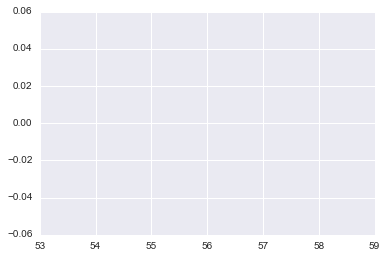

In [36]:
sns.distplot(clean_data.mean_temperature)

This simple plot just visualizes the distribution of the average temperature across all the days we collected data for; specifically, it plots the histogram (the bars) and an estimate of the distribution (the line). We can also just plot the histogram.

TypeError: 'numpy.float64' object cannot be interpreted as an integer

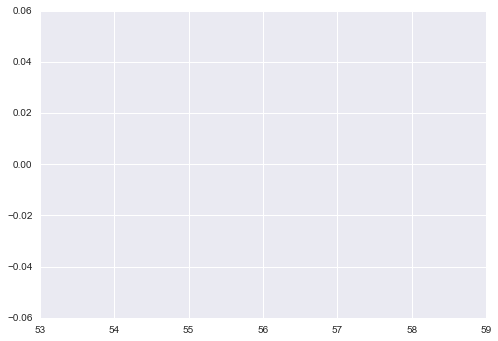

In [19]:
sns.distplot(clean_data.mean_temperature, kde=False)

Neat! Let's add a title and some axis labels.

TypeError: 'numpy.float64' object cannot be interpreted as an integer

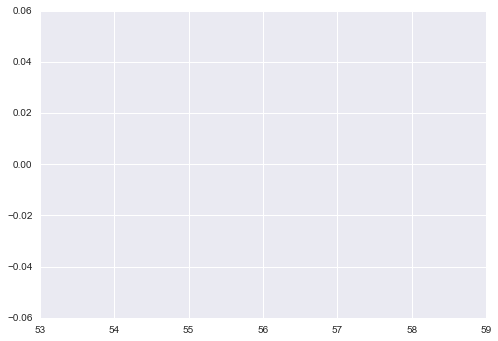

In [24]:
sns.distplot(clean_data.mean_temperature, kde=False)
sns.plt.title('Daily Average Temperature (2013 - 2015)')
sns.plt.xlabel('Temperature')
sns.plt.ylabel('Frequency')

That looks like a pretty fancy graph. Let's zoom in on a portion by setting the limits of the plot; we'll also change the bin size accordingly since we're looking at a portion of the plot.

In [ ]:
sns.distplot(clean_data.mean_temperature, kde=False, bins=40)
sns.plt.title('Zoomed In - Daily Average Temperature (2013 - 2015)')
sns.plt.xlabel('Temperature')
sns.plt.ylabel('Frequency')
sns.plt.xlim((30, 60))
sns.plt.ylim((0, 50))

These same functions that we've been using to edit the graph can be used more generally, but let's move on to move interesting graphs. Namely, let's try plotting the histograms of the average and maximum temperature on the same graph.

In [ ]:
sns.distplot(clean_data.mean_temperature, kde=False)
sns.distplot(clean_data.max_temperature, kde=False)
sns.plt.title('Daily Average and Max Temperature (2013 - 2015)')
sns.plt.xlabel('Temperature')
sns.plt.ylabel('Frequency')

Whoa, cool plot alert! Let's add a legend to make sure someone looking at the plot knows which histogram is which.

In [ ]:
sns.distplot(clean_data.mean_temperature, kde=False, label="Average Temperature")
sns.distplot(clean_data.max_temperature, kde=False, label="Max Temperature")
sns.plt.title('Daily Average and Max Temperature (2013 - 2015)')
sns.plt.xlabel('Temperature')
sns.plt.ylabel('Frequency')
sns.plt.legend()

We're getting pretty good at this. Let's try plotting a scatterplot to see the relationship between temperature and precipitation.

In [ ]:
sns.plt.scatter(clean_data.mean_temperature, clean_data.precipitation)
sns.plt.title('Temperature vs Precipitation')
sns.plt.xlabel('Temperature')
sns.plt.ylabel('Precipitation')

This plot can help us think about the next step of modeling the data; it doesn't seem like temperature by itself will do a great job of predicting the amount of precipitation since there's a range of possible precipitation values for each temperature.

It'd be a hassle to do a scatterplot for every possible variable, but luckily, we can use the built in `pairplot` function. (We're only taking a few columns of the `clean_data` data frame though to keep things managable.)

In [ ]:
sns.pairplot(clean_data, vars=["mean_temperature", "precipitation", "dew_point", "wind_speed"])

In this level, we looked at how to explore our data to make sure nothing's wrong with it and to start thinking about how to model precipitation. Once you're ready, we'll see you on the next level to start modeling the data.